In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("listings.csv")
df = df[df['price'] > 0]
df = df[df['price'] < 1000]
df = df.dropna(subset=['number_of_reviews', 'minimum_nights', 'availability_365'])


In [3]:
features = ['minimum_nights', 'number_of_reviews', 'availability_365']
X = df[features]
y = df['price']


In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

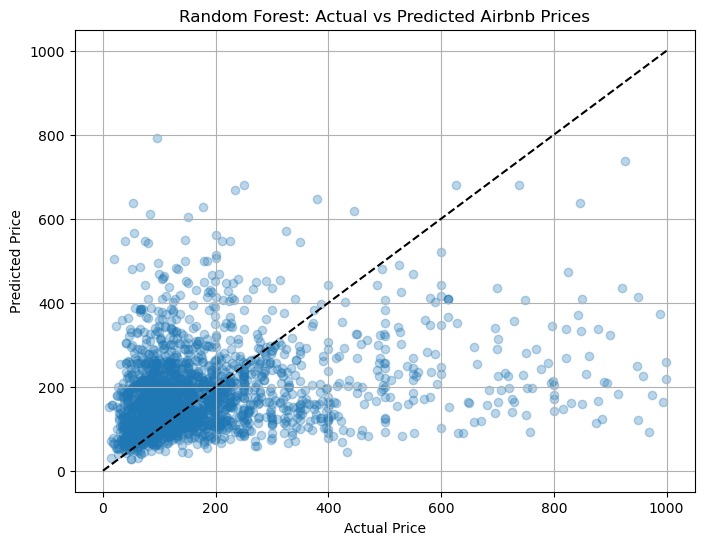

In [6]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([0, 1000], [0, 1000], 'k--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Random Forest: Actual vs Predicted Airbnb Prices")
plt.grid(True)
plt.show()

-Random Forest did a better job capturing the complexity in Airbnb pricing compared to the SVM model from last week.

-It doesn't assume a linear relationship, which probably helped here because pricing isn't really a straight line thing.

-The actual vs. predicted plot looks tighter around the diagonal, still some spread, but way better than that flat line from SVM.

-This gives me more confidence that we can model Airbnb prices with tree based models like RF.

-I only used a few features (availability, reviews, etc.) and still got a decent result.So I am thinking I might improve even more if I add more meaningful features like location or room type later.

-Overall, this is a solid step forward in my capstone better predictive power and more realistic outputs.